# 샘플 데이터와 Non-Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data

### 1.1 Sample Data

In [4]:
from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1500, random_state=170)

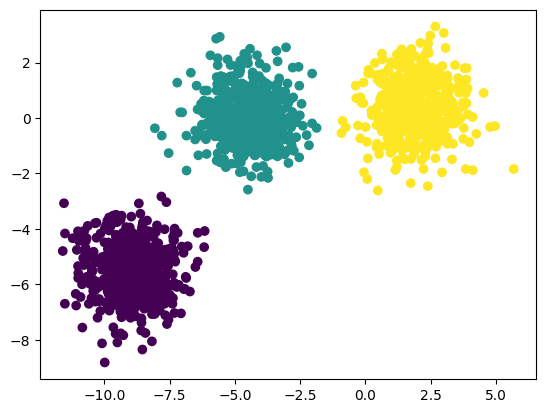

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=label)

## 2. K Means

### 2.1 정확한 군집의 개수를 맞춘 경우

In [6]:
from sklearn.cluster import KMeans

correct_kmeans = KMeans(n_clusters=3)

In [8]:
correct_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
correct_pred = correct_kmeans.predict(data)

In [12]:
correct_kmeans.cluster_centers_   # 각 군집별 중심 위치

array([[ 1.91176144,  0.40634045],
       [-8.94137566, -5.48137132],
       [-4.55490993,  0.02920864]])

In [13]:
correct_center = correct_kmeans.cluster_centers_

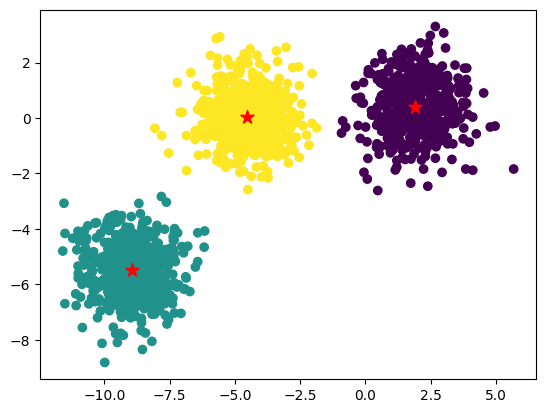

In [14]:
plt.scatter(data[:, 0], data[:, 1], c=correct_pred)
plt.scatter(correct_center[:, 0], correct_center[:, 1], marker="*", s=100, color="red")

### 2.2 군집의 개수를 틀린 경우

#### 2.2.1 군집의 개수를 실제보다 적게 준 경우

In [15]:
small_kmeans = KMeans(n_clusters=2)

In [16]:
small_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [17]:
small_pred = small_kmeans.predict(data)

In [18]:
small_center = small_kmeans.cluster_centers_

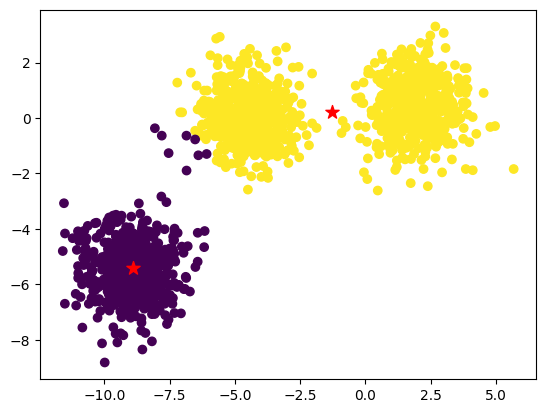

In [19]:
plt.scatter(data[:, 0], data[:, 1], c=small_pred)
plt.scatter(small_center[:, 0], small_center[:, 1], marker="*", s=100, color="red")

#### 2.2.2 군집의 개수를 실제보다 많게 준 경우

In [20]:
large_kmeans = KMeans(n_clusters=4)

In [21]:
large_kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
large_pred = large_kmeans.predict(data)

In [24]:
large_center = large_kmeans.cluster_centers_

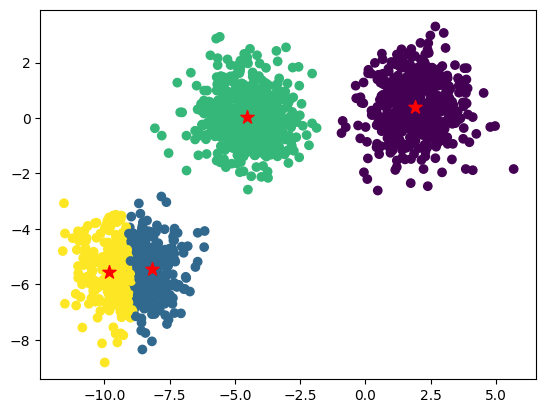

In [25]:
plt.scatter(data[:, 0], data[:, 1], c=large_pred)
plt.scatter(large_center[:, 0], large_center[:, 1], marker="*", s=100, color="red")

### 2.3 적절한 K 찾기

In [26]:
sse_per_n = []

for n in range(1, 12, 2):
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(data)
  sse = kmeans.inertia_
  sse_per_n += [sse]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Sum of Squared Error')

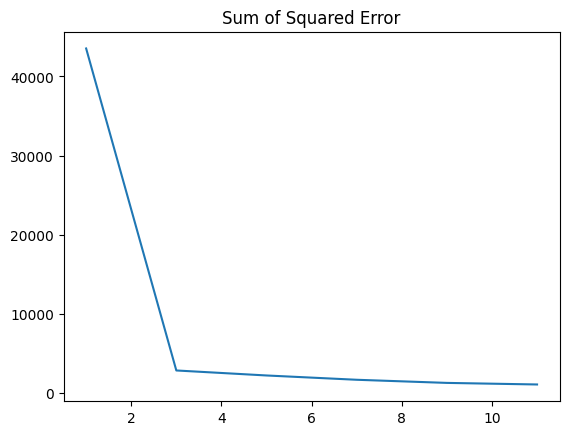

In [28]:
plt.plot(range(1, 12, 2), sse_per_n)    # 3부분에서 그래프가 꺾이므로 Cluster의 개수를 3으로 설정하는것이 적절하다는 것을 알 수 있음
plt.title("Sum of Squared Error")

## 3. K Means의 한계

### 3.1 서로 다른 크기의 군집

In [29]:
size_data, size_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

In [30]:
size_data = np.vstack(
    (size_data[size_label == 0][:500],
     size_data[size_label == 1][:100],
     size_data[size_label == 2][:10])
)
size_label = [0] * 500 + [1] * 100 + [2] * 10

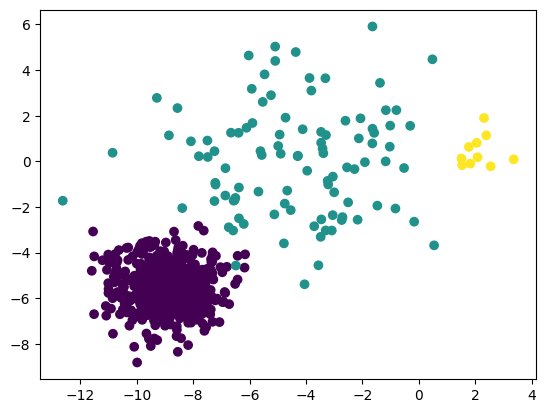

In [31]:
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_label)

In [32]:
size_kmeans = KMeans(n_clusters=3, random_state=2021)

In [33]:
size_pred = size_kmeans.fit_predict(size_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
size_center = size_kmeans.cluster_centers_

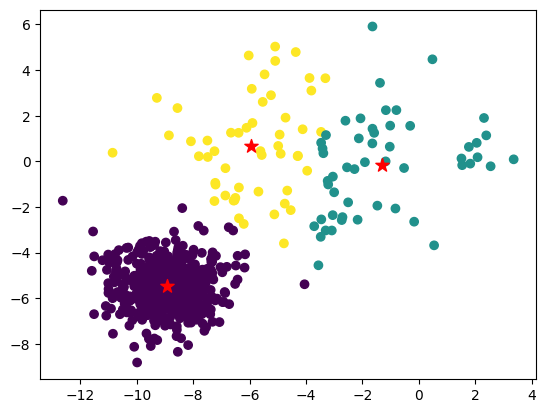

In [36]:
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_pred)
plt.scatter(size_center[:, 0], size_center[:, 1], marker="*", s=100, color="red")   # 넓게 퍼져있는 데이터에 대해 군집화를 잘 하지 못함

### 3.2 서로 다른 밀도의 군집

In [37]:
density_data, density_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

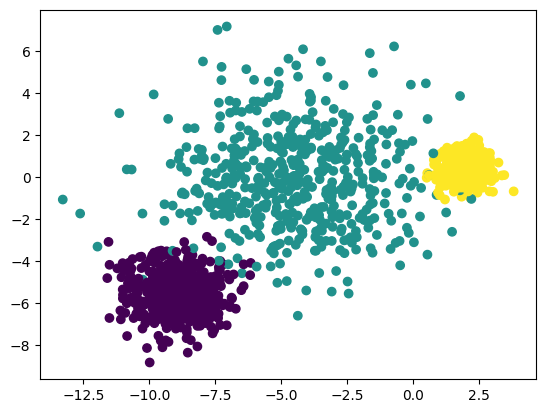

In [38]:
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_label)

In [43]:
density_kmeans = KMeans(n_clusters=3, random_state=2021)

In [44]:
density_pred = density_kmeans.fit_predict(density_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [46]:
density_center = density_kmeans.cluster_centers_

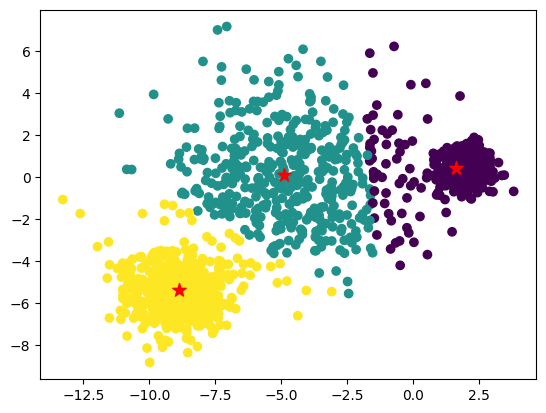

In [47]:
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_pred)
plt.scatter(density_center[:, 0], density_center[:, 1], marker="*", s=100, color="red")

### 3.3 지역적 패턴이 있는 군집

In [49]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
pattern_data = np.dot(data, transformation)

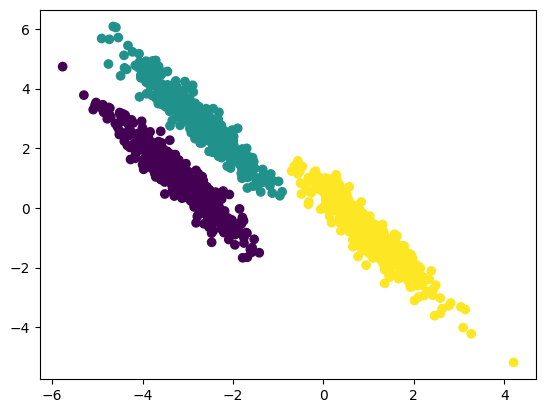

In [50]:
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=label)

In [51]:
pattern_kmeans = KMeans(n_clusters=3, random_state=2021)

In [52]:
pattern_pred = pattern_kmeans.fit_predict(pattern_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
pattern_center = pattern_kmeans.cluster_centers_

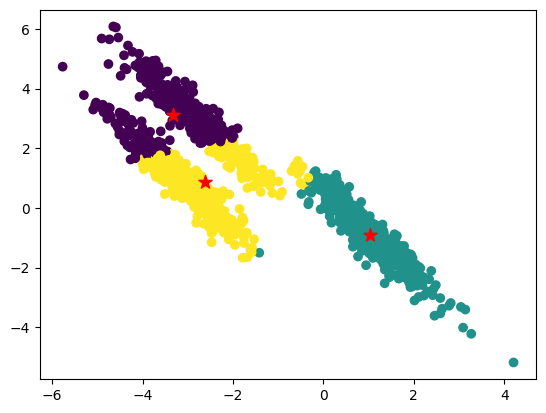

In [55]:
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_pred)
plt.scatter(pattern_center[:, 0], pattern_center[:, 1], marker="*", s=100, color="red")

## 4. DBSCAN
DBSCAN을 이용해 K Means의 한계가 있던 데이터에 적용

In [56]:
from sklearn.cluster import DBSCAN

### 4.1 서로 다른 크기의 군집

In [57]:
size_dbscan = DBSCAN(eps=1.0)

In [58]:
size_db_pred = size_dbscan.fit_predict(size_data)

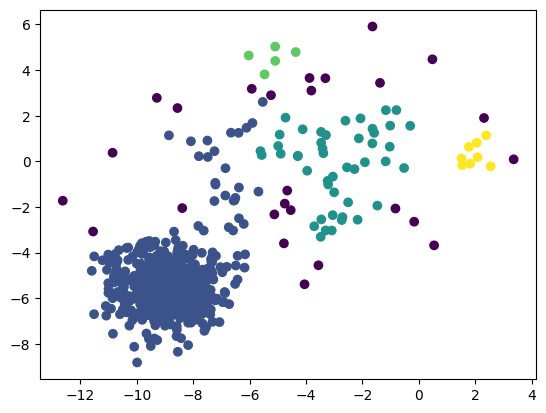

In [61]:
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_db_pred)   # 색상별로 군집을 형성한 것이고, 보라색 데이터의 경우 DBSCAN의 경우 발생하는 노이즈 데이터임

### 4.2 서로 다른 밀도의 군집

In [62]:
density_dbscan = DBSCAN()

In [63]:
density_db_pred = density_dbscan.fit_predict(density_data)

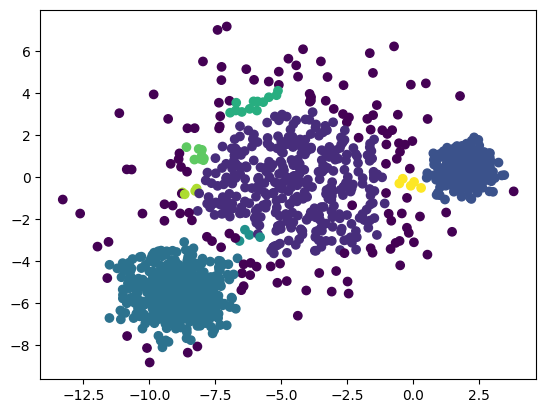

In [64]:
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_db_pred)

### 4.3 지역적 패턴이 있는 군집

In [65]:
pattern_db = DBSCAN(eps=.3, min_samples=20)

In [66]:
pattern_db_pred = pattern_db.fit_predict(pattern_data)

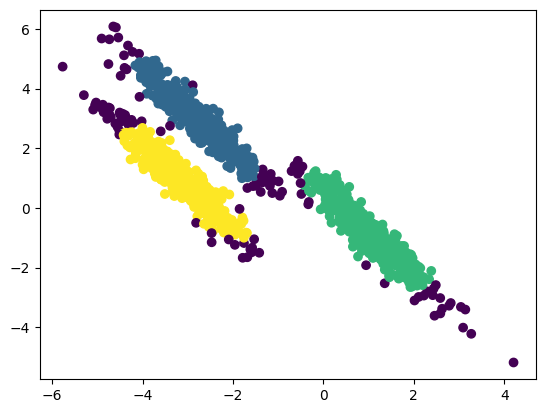

In [67]:
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_db_pred)